<a href="https://colab.research.google.com/github/HossamSaoud/MachineLearning_Notebooks/blob/main/PyTorchRevision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

### Linear Regression

In [ ]:
N = 100
# N random numbers ranging from -5 to 5
input = np.random.random(N)*10 - 5
target = 0.5*input - 1 + np.random.randn(N)
losses = []

X = input.reshape(-1,1)
Y = target.reshape(-1,1)
X = torch.from_numpy(X.astype(np.float32))
Y = torch.from_numpy(Y.astype(np.float32))
model = nn.Linear(1,1)
optimizer = optim.Adam(model.parameters(),lr=0.1)
criterion = nn.MSELoss()
n_epochs = 200
for i in range(n_epochs):
  # reset gradients in optimizer to zero
    optimizer.zero_grad()
  #get the output of model Yhat
    output = model(X)
  # calculate loss between Ytrue and Yhat
    loss = criterion(output,Y)
  # append losses to array in order to plot them later
    losses.append(loss.item())
  # move backward and optimize
    loss.backward()
  # take step toward the good direction(gradient)
    optimizer.step()

    print(f'Epoch {i}/{n_epochs}, Loss: {np.round(loss.item(),4)}')



Epoch 0/200, Loss: 2.5241
Epoch 1/200, Loss: 2.352
Epoch 2/200, Loss: 2.0879
Epoch 3/200, Loss: 1.8832
Epoch 4/200, Loss: 1.7278
Epoch 5/200, Loss: 1.5711
Epoch 6/200, Loss: 1.4193
Epoch 7/200, Loss: 1.2961
Epoch 8/200, Loss: 1.2062
Epoch 9/200, Loss: 1.1342
Epoch 10/200, Loss: 1.0688
Epoch 11/200, Loss: 1.0134
Epoch 12/200, Loss: 0.9758
Epoch 13/200, Loss: 0.9577
Epoch 14/200, Loss: 0.9521
Epoch 15/200, Loss: 0.9506
Epoch 16/200, Loss: 0.9513
Epoch 17/200, Loss: 0.957
Epoch 18/200, Loss: 0.9691
Epoch 19/200, Loss: 0.9844
Epoch 20/200, Loss: 0.9975
Epoch 21/200, Loss: 1.006
Epoch 22/200, Loss: 1.0114
Epoch 23/200, Loss: 1.0158
Epoch 24/200, Loss: 1.0192
Epoch 25/200, Loss: 1.0195
Epoch 26/200, Loss: 1.0154
Epoch 27/200, Loss: 1.0082
Epoch 28/200, Loss: 1.0003
Epoch 29/200, Loss: 0.9929
Epoch 30/200, Loss: 0.9851
Epoch 31/200, Loss: 0.9764
Epoch 32/200, Loss: 0.9675
Epoch 33/200, Loss: 0.9599
Epoch 34/200, Loss: 0.9544
Epoch 35/200, Loss: 0.9503
Epoch 36/200, Loss: 0.9468
Epoch 37/200, 

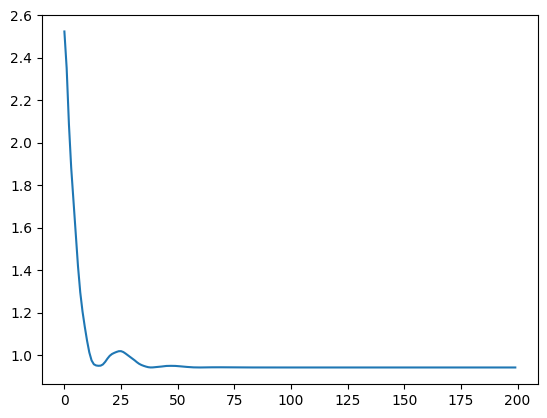

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
predicted = model(X).detach().numpy()

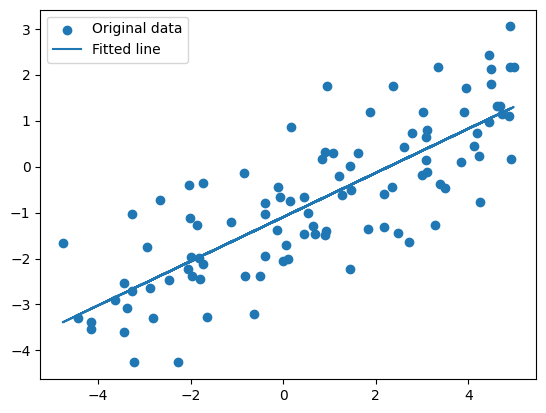

In [ ]:
plt.scatter(input,target, label = "Original data")
plt.plot(input,predicted, label ="Fitted line")
plt.legend()
plt.show()

### Linear Classification

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
breast_cancer = load_breast_cancer()
type(breast_cancer)

sklearn.utils._bunch.Bunch

In [ ]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [ ]:
X_train.shape , y_train.shape

(torch.Size([113, 30]), torch.Size([113, 1]))

In [ ]:
model = nn.Sequential( nn.Linear(X_train.shape[1],1),
                       nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())
n_epochs = 2000
train_losses = []
test_losses = []

In [ ]:
for i in range (n_epochs):
  optimizer.zero_grad()
  output = model(X_train)
  loss = criterion(output,y_train)
  train_losses.append(loss.item())
  output = model(X_test)
  loss = criterion(output,y_test)
  test_losses.append(loss.item())
  loss.backward()
  optimizer.step()
  if i  % 100 == 0:
   print(f'Epoch {i}/{n_epochs}, Loss: {np.round(loss.item(),4)}')

Epoch 0/2000, Loss: 0.6118
Epoch 100/2000, Loss: 0.3081
Epoch 200/2000, Loss: 0.2209
Epoch 300/2000, Loss: 0.1789
Epoch 400/2000, Loss: 0.1537
Epoch 500/2000, Loss: 0.1369
Epoch 600/2000, Loss: 0.1248
Epoch 700/2000, Loss: 0.1156
Epoch 800/2000, Loss: 0.1084
Epoch 900/2000, Loss: 0.1026
Epoch 1000/2000, Loss: 0.0978
Epoch 1100/2000, Loss: 0.0938
Epoch 1200/2000, Loss: 0.0903
Epoch 1300/2000, Loss: 0.0873
Epoch 1400/2000, Loss: 0.0847
Epoch 1500/2000, Loss: 0.0823
Epoch 1600/2000, Loss: 0.0802
Epoch 1700/2000, Loss: 0.0784
Epoch 1800/2000, Loss: 0.0767
Epoch 1900/2000, Loss: 0.0752


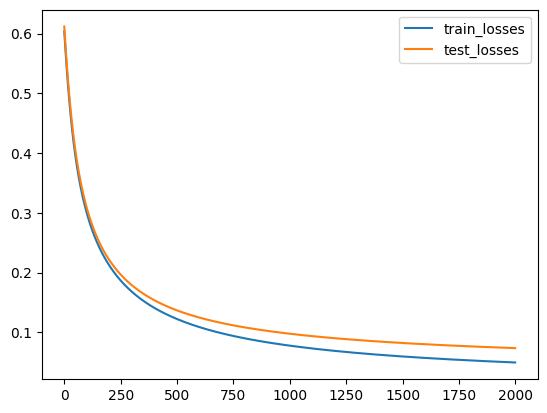

In [ ]:
plt.plot(train_losses,label= "train_losses")
plt.plot(test_losses,label = "test_losses")
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  train_output = model(X_train)
  train_acc = np.mean(train_output.numpy().round()==y_train.numpy())
  test_output = model(X_test)
  test_acc = np.mean(test_output.numpy().round()==y_test.numpy())

  print(f'Train accuracy: {train_acc}')
  print(f'Test accuracy: {test_acc}')

Train accuracy: 1.0
Test accuracy: 0.9824561403508771


###MultiClass Classification

In [ ]:
from torchvision.datasets import MNIST as data
from torchvision import transforms

In [ ]:
data

torchvision.datasets.mnist.MNIST

In [ ]:
train_dataset = data(root='./data',download=True,train=True,transform=transforms.ToTensor())
test_dataset= data(root='./data',download=True,train=False,transform=transforms.ToTensor())

In [ ]:
x_train,y_train = train_dataset.data,train_dataset.targets
x_test,y_test = test_dataset.data,test_dataset.targets

In [ ]:
x_train.shape,y_train.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,batch_size = 64, shuffle = False)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
n_epochs = 10
train_losses = []
test_losses = []
for i in range(n_epochs):
  train_batch_loss = []
  test_batch_loss = []
  for inputs, targets in train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    optimizer.zero_grad()
    inputs = inputs.view(-1,784)
    output = model(inputs)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()
    train_batch_loss.append(loss.item())
  train_losses.append(np.mean(train_batch_loss))
  for inputs, targets in test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    inputs = inputs.view(-1,784)
    output =model(inputs)
    loss = criterion(output, targets)
    test_batch_loss.append(loss.item())
  test_losses.append(np.mean(test_batch_loss))

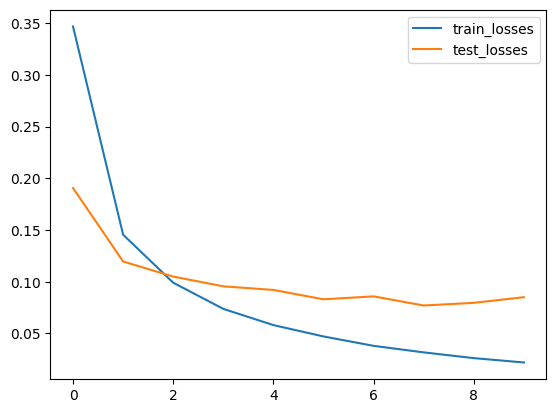

In [ ]:
plt.plot(train_losses,label = "train_losses")
plt.plot(test_losses,label = "test_losses")
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0

for inputs,targets in test_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  inputs= inputs.view(-1,784)
  output = model(inputs)
  _,predicted = torch.max(output,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Test accuracy: {acc*100}')

for inputs,targets in train_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  inputs= inputs.view(-1,784)
  output = model(inputs)
  _,predicted = torch.max(output.data,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Train accuracy: {acc*100}')


Test accuracy: 97.74000000000001
Train accuracy: 99.25142857142856


## ANN with oop

In [ ]:
class ANN(nn.Module):
  def __init__ (self,input_size,hidden_size,output_size):
    super(ANN,self).__init__()
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size,output_size)

  def forward(self,x):
      x = self.fc1(x)
      x = self.relu(x)
      x = self.fc2(x)
      return x

In [ ]:
model = ANN(784,128,10)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())



In [ ]:
n_epochs = 10
train_losses = []
test_losses = []
for i in range(n_epochs):
  train_batch_loss = []
  test_batch_loss = []
  for inputs, targets in train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    optimizer.zero_grad()
    inputs = inputs.view(-1,784)
    output = model(inputs)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()
    train_batch_loss.append(loss.item())
  train_losses.append(np.mean(train_batch_loss))
  for inputs, targets in test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    inputs = inputs.view(-1,784)
    output =model(inputs)
    loss = criterion(output, targets)
    test_batch_loss.append(loss.item())
  test_losses.append(np.mean(test_batch_loss))

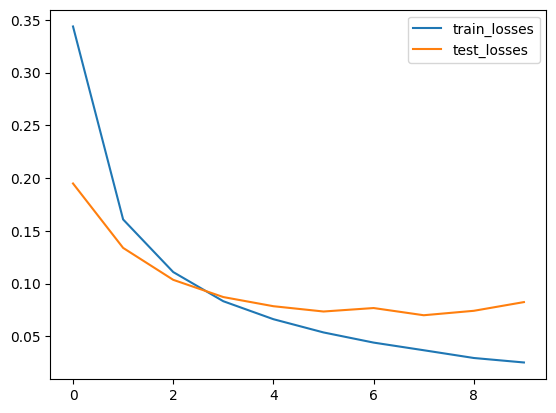

In [ ]:
plt.plot(train_losses,label = "train_losses")
plt.plot(test_losses,label = "test_losses")
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0

for inputs,targets in test_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  inputs= inputs.view(-1,784)
  output = model(inputs)
  _,predicted = torch.max(output,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Test accuracy: {acc*100}')

for inputs,targets in train_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  inputs= inputs.view(-1,784)
  output = model(inputs)
  _,predicted = torch.max(output.data,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Train accuracy: {acc*100}')


Test accuracy: 97.6
Train accuracy: 99.08857142857143


## CNN on Mnist

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.c1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3)
    self.act = nn.ReLU()
    self.pool = nn.MaxPool2d(kernel_size = 2)
    self.c2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3)
    self.fc1 = nn.Linear(16*5*5,64)
    self.fc2 = nn.Linear(64,10)
  def forward(self,x):
    x = self.c1(x)
    x = self.act(x)
    x = self.pool(x)
    x = self.c2(x)
    x = self.act(x)
    x = self.pool(x)
    x = x.view(-1,16*5*5)
    x = self.fc1(x)
    x = self.act(x)
    x = self.fc2(x)
    return x

In [ ]:
model = CNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
train_dataset = data(root='./data',download = True, train = True, transform = transforms.ToTensor())
test_dataset = data(root=',/data',download = True, train=False, transform = transforms.ToTensor())

In [ ]:
x_train,y_train = train_dataset.data , train_dataset.targets
x_test, y_test = test_dataset.data, test_dataset.targets

In [ ]:
x_train.shape , y_train.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)

In [ ]:
train_loss = []
test_loss = []
n_epochs = 10
model.train()
for i in range(n_epochs):
  train_batch_losses = []
  test_batch_losses = []
  for inputs,targets in train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()
    train_batch_losses.append(loss.item())
  train_loss.append(np.mean(train_batch_losses))

  for inputs,targets in test_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    output = model(inputs)
    loss = criterion(output,targets)
    test_batch_losses.append(loss.item())
  test_loss.append(np.mean(test_batch_losses))


In [ ]:
print(f'train loss: {np.mean(train_loss)}')
print(f'test loss: {np.mean(test_loss)}')

train loss: 0.07954209714945411
test loss: 0.05180429460969538


In [ ]:
n_correct = 0
n_total = 0
model.eval()

for inputs,targets in test_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  output = model(inputs)
  _,predicted = torch.max(output,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Test accuracy: {acc*100}')

for inputs,targets in train_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  output = model(inputs)
  _,predicted = torch.max(output.data,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Train accuracy: {acc*100}')


Test accuracy: 98.83
Train accuracy: 99.36714285714285


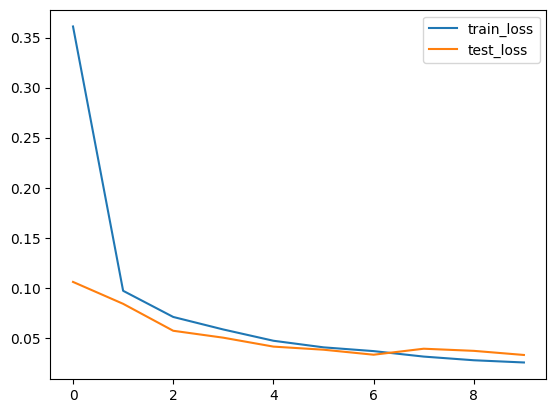

In [ ]:
plt.plot(train_loss,label = "train_loss")
plt.plot(test_loss,label = "test_loss")
plt.legend()
plt.show()
#

##CNN on FashionMNIST

In [ ]:
from torchvision.datasets import FashionMNIST as data

In [ ]:
from torchvision import transforms

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.c1 = nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size= 3)
    self.act = nn.ReLU()
    self.c2 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 3)
    self.pool = nn.MaxPool2d(kernel_size = 2)

    self.fc1 = nn.Linear(16*5*5,64)
    self.fc2 = nn.Linear(64,128)
    self.fc3 = nn.Linear(128,10)
  def forward(self,x):
    x = self.c1(x)
    x = self.act(x)
    x = self.pool(x)
    x = self.c2(x)
    x = self.act(x)
    x = self.pool(x)
    x = x.view(-1,16*5*5)
    x = self.fc1(x)
    x = self.act(x)
    x = self.fc2(x)
    x = self.act(x)
    x = self.fc3(x)
    return x

In [ ]:
train_dataset = data(root='./data',download = True, train = True, transform = transforms.ToTensor())
test_dataset = data(root=',/data',download = True, train=False, transform = transforms.ToTensor())

In [ ]:
x_train , y_train = train_dataset.data, train_dataset.targets
x_test, y_test = test_dataset.data, test_dataset.targets

In [ ]:
x_train.shape

torch.Size([60000, 28, 28])

In [ ]:
model = CNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 128, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 128, shuffle = False)

In [ ]:
train_losses = []
test_losses = []
n_epochs = 20

for i in range(n_epochs):
  train_batch_losses = []
  test_batch_losses = []
  for inputs , targets in train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()
    train_batch_losses.append(loss.item())
    train_loss = np.mean(train_batch_losses)
  train_losses.append(np.mean(train_loss))
  for inputs , targets in test_loader:

    inputs, targets = inputs.to(device),targets.to(device)
    output = model(inputs)
    loss = criterion(output,targets)
    test_batch_losses.append(loss.item())
    test_loss = np.mean(test_batch_losses)
  test_losses.append(test_loss)
  print(f'Epoch {i}/{n_epochs}, Train Loss: {np.round(loss.item(),4)} Test Loss: {np.round(test_loss,4)}')

Epoch 0/20, Train Loss: 0.1706 Test Loss: 0.4089
Epoch 1/20, Train Loss: 0.2583 Test Loss: 0.3922
Epoch 2/20, Train Loss: 0.3146 Test Loss: 0.3377
Epoch 3/20, Train Loss: 0.6779 Test Loss: 0.3616
Epoch 4/20, Train Loss: 0.1591 Test Loss: 0.3566
Epoch 5/20, Train Loss: 0.2718 Test Loss: 0.3326
Epoch 6/20, Train Loss: 0.6284 Test Loss: 0.3572
Epoch 7/20, Train Loss: 0.2172 Test Loss: 0.363
Epoch 8/20, Train Loss: 0.19 Test Loss: 0.3578
Epoch 9/20, Train Loss: 0.0717 Test Loss: 0.3502
Epoch 10/20, Train Loss: 0.1142 Test Loss: 0.3255
Epoch 11/20, Train Loss: 0.375 Test Loss: 0.3425
Epoch 12/20, Train Loss: 0.2186 Test Loss: 0.353
Epoch 13/20, Train Loss: 0.2453 Test Loss: 0.3345
Epoch 14/20, Train Loss: 0.4179 Test Loss: 0.3449
Epoch 15/20, Train Loss: 0.4109 Test Loss: 0.3608
Epoch 16/20, Train Loss: 0.1256 Test Loss: 0.3499
Epoch 17/20, Train Loss: 0.1474 Test Loss: 0.3819
Epoch 18/20, Train Loss: 0.149 Test Loss: 0.3378
Epoch 19/20, Train Loss: 1.1183 Test Loss: 0.3552


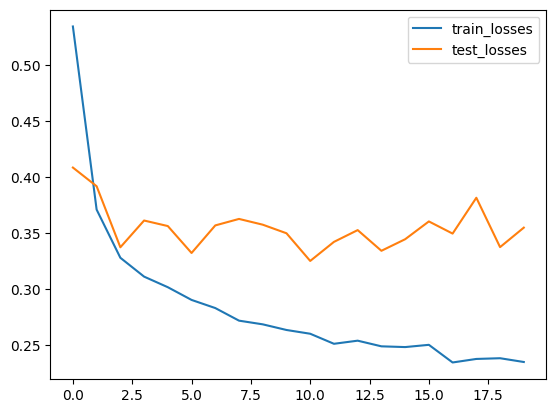

In [ ]:

plt.plot(train_losses,label = "train_losses")
plt.plot(test_losses,label = "test_losses")
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0
model.eval()

for inputs,targets in test_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  output = model(inputs)
  _,predicted = torch.max(output,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Test accuracy: {acc*100}')

for inputs,targets in train_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  output = model(inputs)
  _,predicted = torch.max(output.data,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Train accuracy: {acc*100}')


Test accuracy: 88.32
Train accuracy: 91.53714285714287


##CNN on CIFAR10


In [ ]:
from torchvision.datasets import CIFAR10 as data

In [ ]:
transforms_train = transforms.Compose([

torchvision.transforms.RandomHorizontalFlip(),
torchvision.transforms.RandomVerticalFlip(),
torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
torchvision.transforms.RandomRotation(degrees=10),
torchvision.transforms.RandomCrop(size=32, padding=2),
torchvision.transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
torchvision.transforms.ToTensor()


])

In [ ]:
train_dataset = data(root='./data',download = True, train= True, transform=transforms_train)
test_dataset = data(root='./data',download = True, train= False, transform = transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
x_train,y_train = train_dataset.data, train_dataset.targets
x_test,y_test = test_dataset.data, test_dataset.targets

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 64, shuffle = False)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels = 3,out_channels = 64,kernel_size = 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Conv2d(in_channels =64,out_channels = 64,kernel_size = 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv2 = nn.Sequential(

                nn.Conv2d(in_channels = 64,out_channels = 128,kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128),
                nn.Conv2d(in_channels = 128,out_channels = 128,kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128),
                nn.MaxPool2d(kernel_size = 2)
    )

    self.conv3 = nn.Sequential(

                nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(256),
                nn.Conv2d(in_channels = 256, out_channels = 256, kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(256),
                nn.MaxPool2d(kernel_size = 2)
    )
    self.conv4 = nn.Sequential(

                nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(512),
                nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(512),
                nn.MaxPool2d(kernel_size = 2)
    )

    self.conv5 = nn.Sequential(

                nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(512),
                nn.Conv2d(in_channels = 512, out_channels = 512, kernel_size = 3,padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(512),
                nn.MaxPool2d(kernel_size = 2)
    )
    self.act = nn.ReLU()
    self.fc1 = nn.Linear(512*2*2,4096)
    self.fc2 = nn.Linear(4096,4096)
    self.fc3 = nn.Linear(4096,10)

  def forward(self,x):

    x = self.conv1(x)


    x = self.conv2(x)

    x = self.conv3(x)

    x = self.conv4(x)

   # x = self.conv5(x)
    x = x.view(-1,512*2*2)

    x = self.fc1(x)
    x = self.act(x)
    x = self.fc2(x)
    x = self.act(x)
    x = self.fc3(x)

    return x

In [ ]:
model = CNN()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(128, 256, 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
n_epochs = 20

In [ ]:
train_losses = []
test_losses = []
for i in range(n_epochs):
  train_batch_losses = []
  test_batch_losses = []
  model.train()
  for inputs,targets in train_loader:
    inputs,targets = inputs.to(device),targets.to(device)
    optimizer.zero_grad()
    output = model(inputs)
    loss = criterion(output,targets)
    loss.backward()
    optimizer.step()
    train_batch_losses.append(loss.item())
  train_loss = np.mean(train_batch_losses)
  train_losses.append(train_loss)
  for inputs,targets in test_loader:
    model.eval()
    inputs,targets = inputs.to(device),targets.to(device)
    output = model(inputs)
    loss = criterion(output,targets)
    test_batch_losses.append(loss.item())
  test_loss = np.mean(test_batch_losses)
  test_losses.append(test_loss)
  print(f'Epoch {i}/{n_epochs}, Train Loss: {np.round(train_loss,4)} Test Loss: {np.round(test_loss,4)}')


Epoch 0/20, Train Loss: 1.9029 Test Loss: 1.618
Epoch 1/20, Train Loss: 1.5166 Test Loss: 1.3322
Epoch 2/20, Train Loss: 1.3088 Test Loss: 1.7411
Epoch 3/20, Train Loss: 1.1891 Test Loss: 1.0601
Epoch 4/20, Train Loss: 1.0613 Test Loss: 0.9558
Epoch 5/20, Train Loss: 0.9973 Test Loss: 0.8325
Epoch 6/20, Train Loss: 0.9296 Test Loss: 1.177
Epoch 7/20, Train Loss: 0.8797 Test Loss: 0.7873
Epoch 8/20, Train Loss: 0.822 Test Loss: 0.8987
Epoch 9/20, Train Loss: 0.7828 Test Loss: 99.954
Epoch 10/20, Train Loss: 0.7873 Test Loss: 0.8857
Epoch 11/20, Train Loss: 0.7304 Test Loss: 0.6207
Epoch 12/20, Train Loss: 0.6999 Test Loss: 0.6451
Epoch 13/20, Train Loss: 0.6753 Test Loss: 0.6738
Epoch 14/20, Train Loss: 0.6587 Test Loss: 0.6723
Epoch 15/20, Train Loss: 0.6361 Test Loss: 0.6086
Epoch 16/20, Train Loss: 0.6242 Test Loss: 0.5101
Epoch 17/20, Train Loss: 0.6042 Test Loss: 0.5356
Epoch 18/20, Train Loss: 0.5905 Test Loss: 0.9837
Epoch 19/20, Train Loss: 0.5698 Test Loss: 8.5284


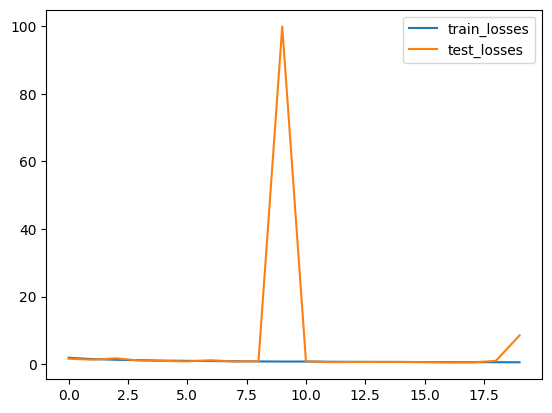

In [ ]:

plt.plot(train_losses,label = "train_losses")
plt.plot(test_losses,label = "test_losses")
plt.legend()
plt.show()

In [ ]:
n_correct = 0
n_total = 0
model.eval()

for inputs,targets in test_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  output = model(inputs)
  _,predicted = torch.max(output,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Test accuracy: {acc*100}')

for inputs,targets in train_loader:
  inputs,targets = inputs.to(device),targets.to(device)
  output = model(inputs)
  _,predicted = torch.max(output.data,1)
  n_correct += (predicted == targets).sum().item()
  n_total += targets.shape[0]
acc = n_correct/n_total
print(f'Train accuracy: {acc*100}')


Test accuracy: 82.92
Train accuracy: 80.415
